# Data Analysis for Flight Data set

Here we have a data set of flights. We see the first 5 rows of the dataset below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
Flights=pd.read_csv('flights.csv')
Flights.head(3)



,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.


Let's review the features of the dataset first:

In [3]:
cols=Flights.columns
Flights.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

As we see below, the dataset belongs to a constant year 2013 and therefore this column is redundant. we also do not need 'id' , 'tailnum' and 'time_hour' in our analysis. Hence we dropped these columns too.
Also We have two colmuns named "month" and "day".
 

In [4]:
print(Flights.year.unique())
df=Flights.drop(labels=['year','id','tailnum','time_hour'], axis=1)  
df.columns

[2013]


Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'name'],
      dtype='object')

 We can classify the features in two groups. First group are called 'nonNumeric' as below. They are used to group data. For example we can do the groupby on 'origin'and analyze the flights with the same origin. 
 The rest of the features are numeric and they are denoted by 'numeric' in below. 

In [5]:

nonNumericCols=['carrier', 'flight','origin', 'dest' , 'name']
numericCols=['month', 'day','hour', 'minute',
       'dep_time','sched_dep_time','dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay',
       'air_time','distance'] 

First, let us see the distribution of numeric features using Plots. Here we plotted the distribution of the features in subplots with 3 columns. Each figure corresponds to the distribution of one feature and the mean and variance of the distribution are declared above the figures for each feature.

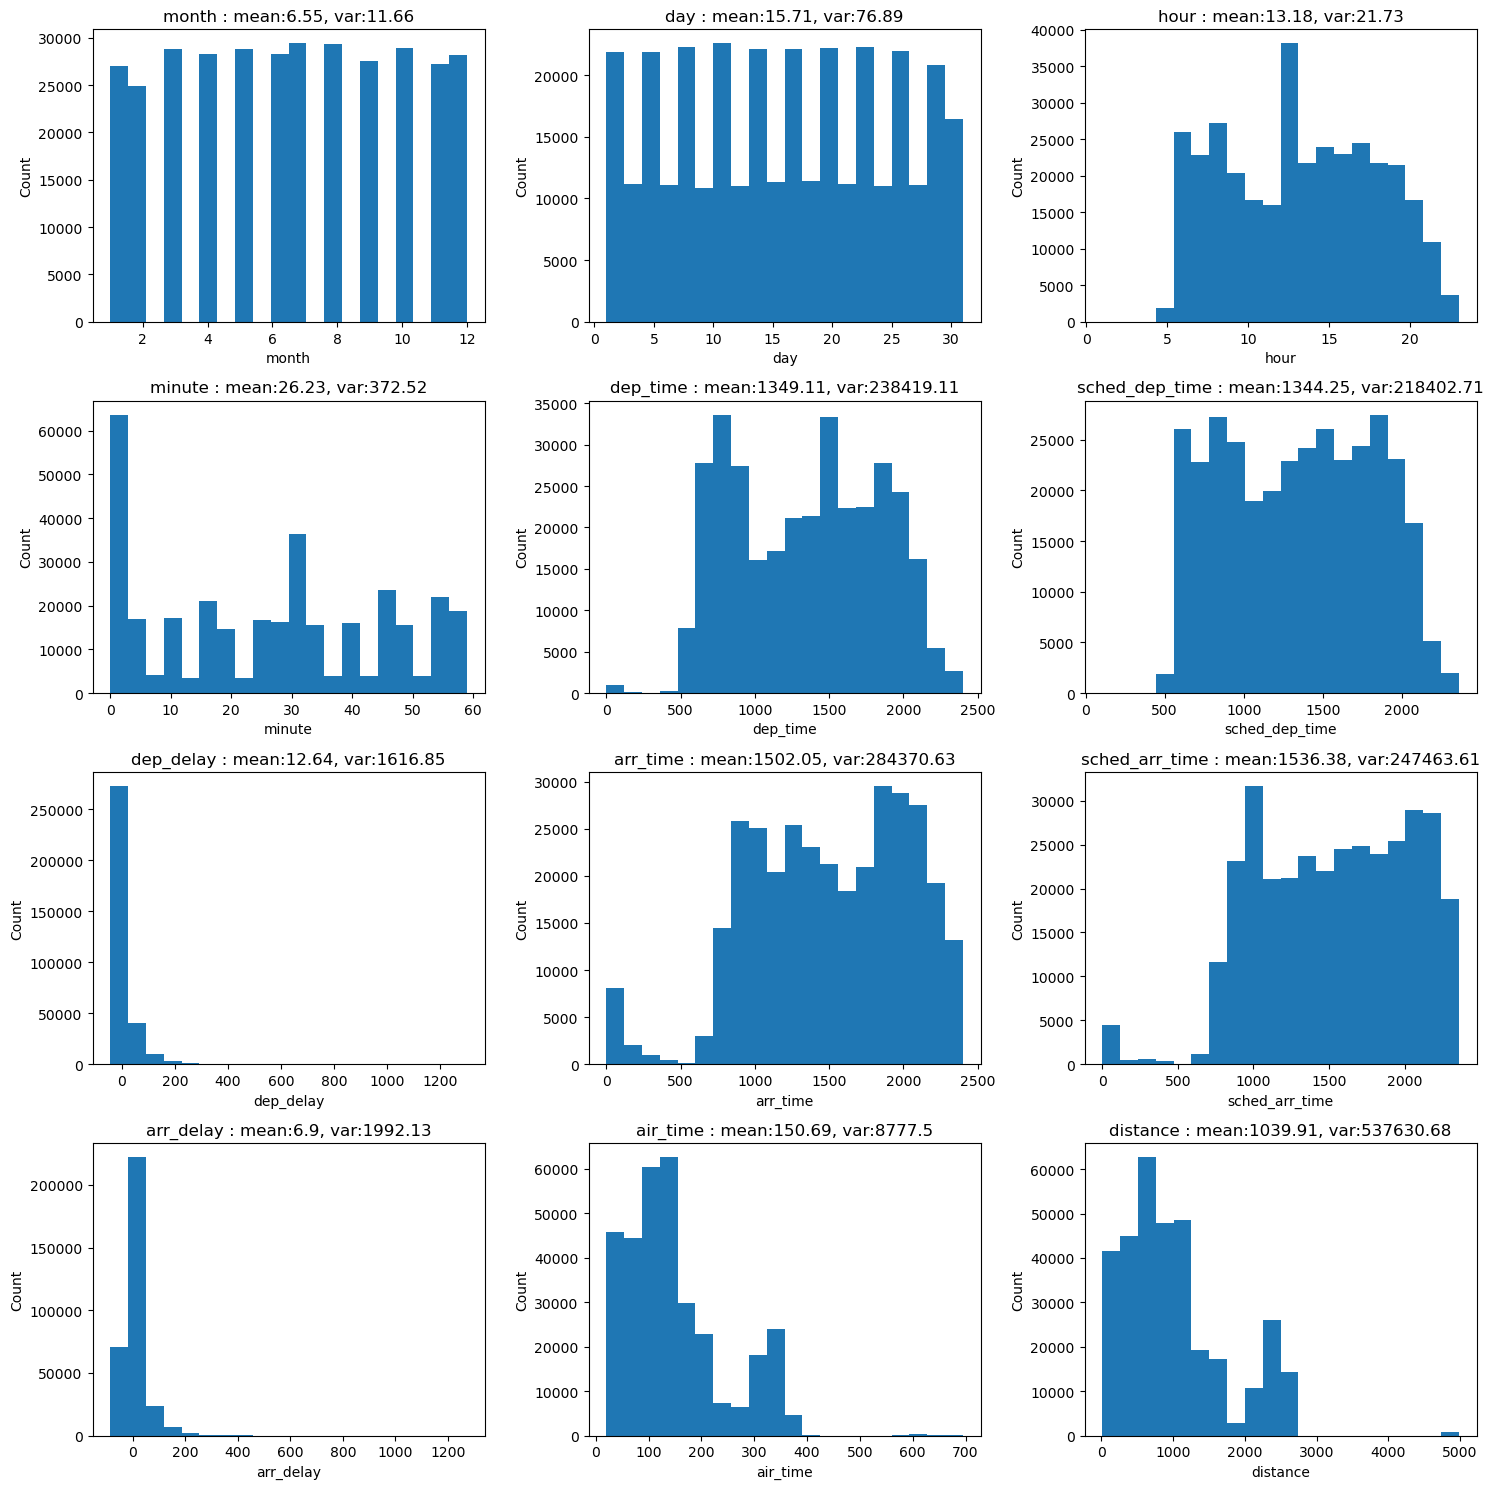

In [6]:
def plotDistributions( df , features):
    n_cols = 3
    n_rows = (len(features) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

    # Plot the distribution of each feature using a histogram
    for i, f in enumerate(features):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col]
        ax.hist(df[f], bins=20)
        ax.set_title('{} : mean:{}, var:{}'.format(f, round(df[f].mean(),2) , round(df[f].var() ,2)))
        ax.set_xlabel(f)
        ax.set_ylabel('Count')

    # Adjust the spacing between subplots
    plt.tight_layout()
    
plotDistributions( df , numericCols)

As is clear the distribution of 'month' is nearly the same in different month of the year (i.e uniform distribution). The distribution of the feature 'day' shows that we have more flights each 2-3 days in between.We can investigate the distribution of other features similarly. But here we just investigate the distribution of two important features 'arr_delay' and 'dep_delay'. As the plots of these two features show, some kurtosis and also it seems that we have noise data.We trimmed 10 percent from right and left tail of the distribution to see the distribution better. We also calculated kurtosis before and after trimming below.We can see that these distributions have right skewness. The value of skewness and kurtosis are shown before and after trimming the data.

before trimming data, the kourtisis of dep_delay is : 43.95011602901041
before trimming data, the skewness of dep_delay is : 4.802540511080034
Now after trimming the data we have:


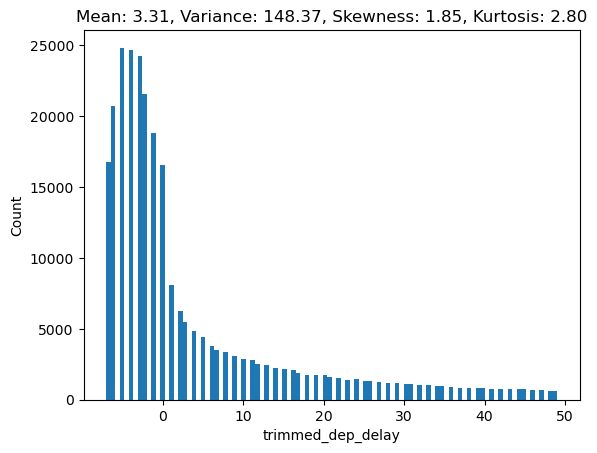

before trimming data, the kourtisis of arr_delay is : 29.233043998766775
before trimming data, the skewness of arr_delay is : 4.802540511080034
Now after trimming the data we have:


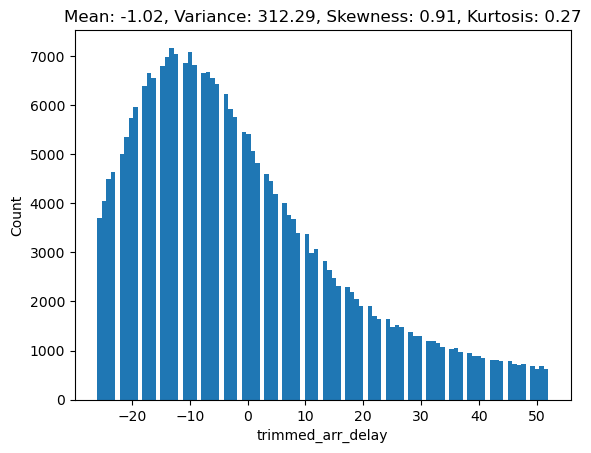

In [13]:
def trimm(df,feature , alpha):
    quantile_alpha, quantile_1_minus_alpha = df[feature].quantile([alpha, 1-alpha])
    trimmed_df = df[feature][(df[feature] >= quantile_alpha) & (df[feature] <= quantile_1_minus_alpha)]
    return trimmed_df

 

def plotOneFeature(seri,trimmedFeatureName):
    mean_value = seri.mean( )
    variance_value = seri.var( )
    skewness_value = seri.skew( )
    kurtosis_value = seri.kurtosis( ) 
    statistics_string = 'Mean: {:.2f}, Variance: {:.2f}, Skewness: {:.2f}, Kurtosis: {:.2f}'.format(mean_value, variance_value, skewness_value, kurtosis_value)
   
    plt.hist(seri, bins=100)
    plt.title(statistics_string)
    plt.xlabel(trimmedFeatureName)
    plt.ylabel('Count')
    plt.show()

print ("before trimming data, the kourtisis of dep_delay is : {}".format(df.dep_delay.kurtosis()))
print ("before trimming data, the skewness of dep_delay is : {}".format(df.dep_delay.skew()))
print('Now after trimming the data we have:')
plotOneFeature(trimm(df,'dep_delay' , 0.1) ,'trimmed_dep_delay')    

print ("before trimming data, the kourtisis of arr_delay is : {}".format(df.arr_delay.kurtosis())) 
print ("before trimming data, the skewness of arr_delay is : {}".format(df.dep_delay.skew()))
print('Now after trimming the data we have:')
plotOneFeature(trimm(df,'arr_delay' , 0.1) ,'trimmed_arr_delay')


Now let us investigate corrolation of the features in pairs. In the following, we have a function "corrolationInGroup"  in order to calculate the corrolation of the factors in groups. In this function we can give a subset of features to group data on it (if no grouping is needed simply ignore this argument). Then the corrolation of the whole or a part of the numeric features (i.e. features in 'numericCols or a subset of them) is computed regarding the groups. 

This function produces the original corrolation matrix and also a printableMatrix version of that. In the printable version, zero corrolations are ignored , the diagonal corrolations are ignored, and so on to be nicely demonstrated.

Note that if the "importantsOnly" argument is set to be True (which is the default case) in this function, then the computed corrolations more than 0.1 (or alpha) are only considered.


In the following, we can see the corrolation matrix grouped by "origins" on all numeric columns: 

In [14]:
def corrolationInGroup(dfrm , clmns, group=[], importantsOnly=True , alpha=0.1):
    if group==[] :
        dfrm= dfrm [clmns]
        numOfGroups=1
    else:
        dfrm= dfrm.groupby(group)[clmns]
        numOfGroups=len(dfrm.groups.keys())
    corrMatrix=dfrm.corr() 
    indexes=corrMatrix.index
    numOfColumns=len(corrMatrix.columns)
        
    printableCorrMatrix = corrMatrix.applymap(lambda x:round(x,2) if round(x,2)!=0 else 0) 
    
    if importantsOnly :
        printableCorrMatrix.where( abs(printableCorrMatrix )> alpha , 0)
    
    npCorr=printableCorrMatrix.to_numpy() 
    npCorr = np.where(npCorr == 0, '  -  ', npCorr)
    
    printableCorrMatrix = pd.DataFrame(npCorr ,index=indexes,columns=corrMatrix.columns )
    
    for i in range(numOfColumns):
                    for j in range(numOfGroups):
                        printableCorrMatrix.iloc[j*numOfColumns+i,i]='  -  '
                    
    return (corrMatrix,printableCorrMatrix) 
 
c,toPrint=corrolationInGroup(df,numericCols,['origin'],importantsOnly=False ) 
print(toPrint)



                       month    day   hour minute dep_time sched_dep_time  \
origin                                                                      
EWR    month             -      -    -0.01   0.02    -0.01          -0.01   
       day               -      -      -      -        -              -     
       hour            -0.01    -      -     0.02     0.97            1.0   
       minute           0.02    -     0.02    -       0.07           0.06   
       dep_time        -0.01    -     0.97   0.07      -             0.97   
       sched_dep_time  -0.01    -      1.0   0.06     0.97            -     
       dep_delay       -0.03   0.01   0.22   0.02      0.3           0.22   
       arr_time          -    -0.01    0.7   0.05      0.7            0.7   
       sched_arr_time  -0.01    -     0.87   0.06     0.86           0.88   
       arr_delay       -0.04    -      0.2   0.02     0.28            0.2   
       air_time         0.05    -    -0.01   0.02    -0.01          -0.01   

Corrolations in group: EWR
Corrolations on feature arr_delay:



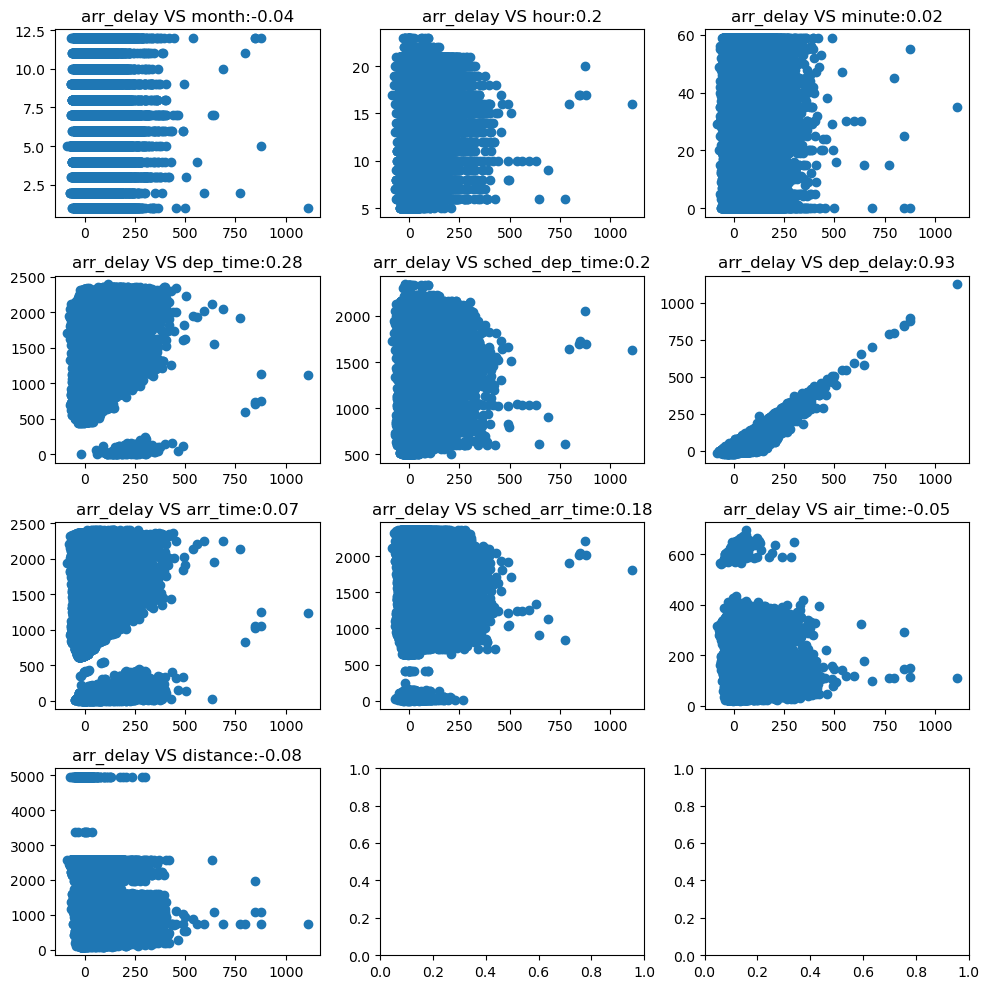

Corrolations on feature dep_delay:



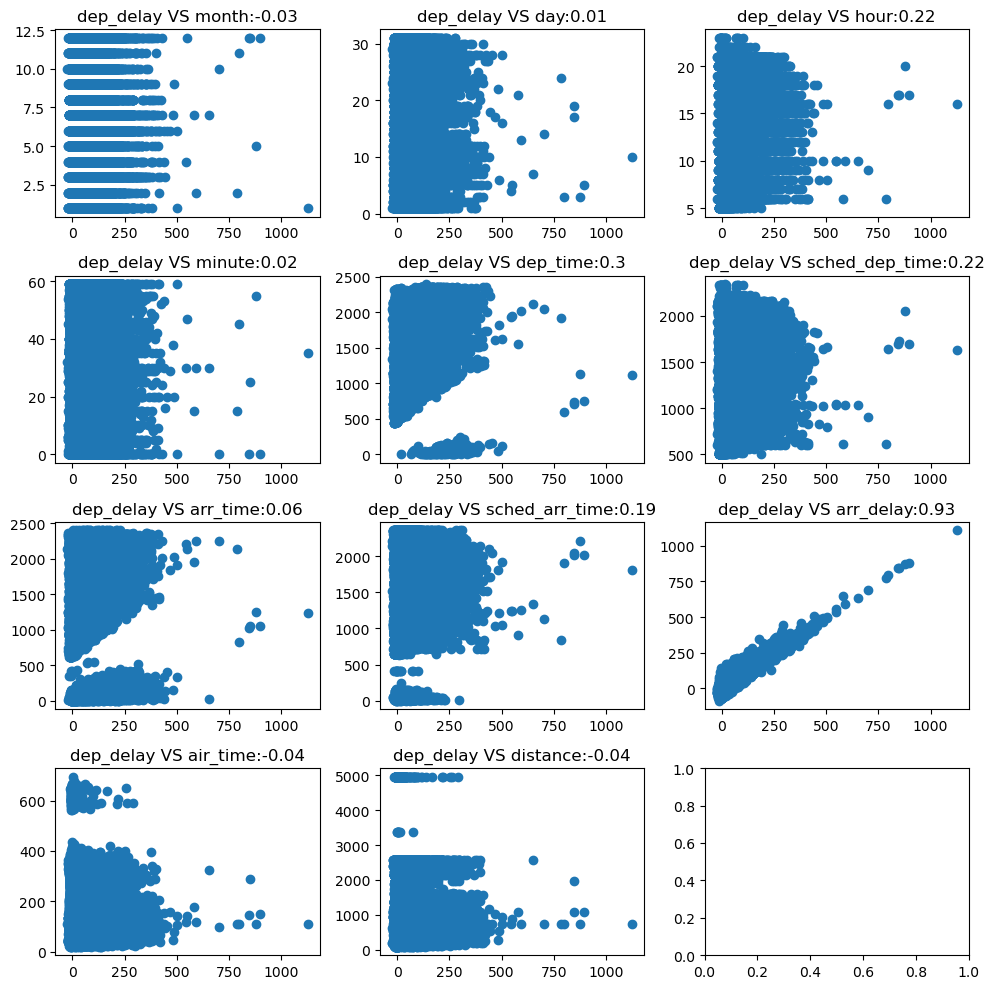

Corrolations in group: JFK
Corrolations on feature arr_delay:



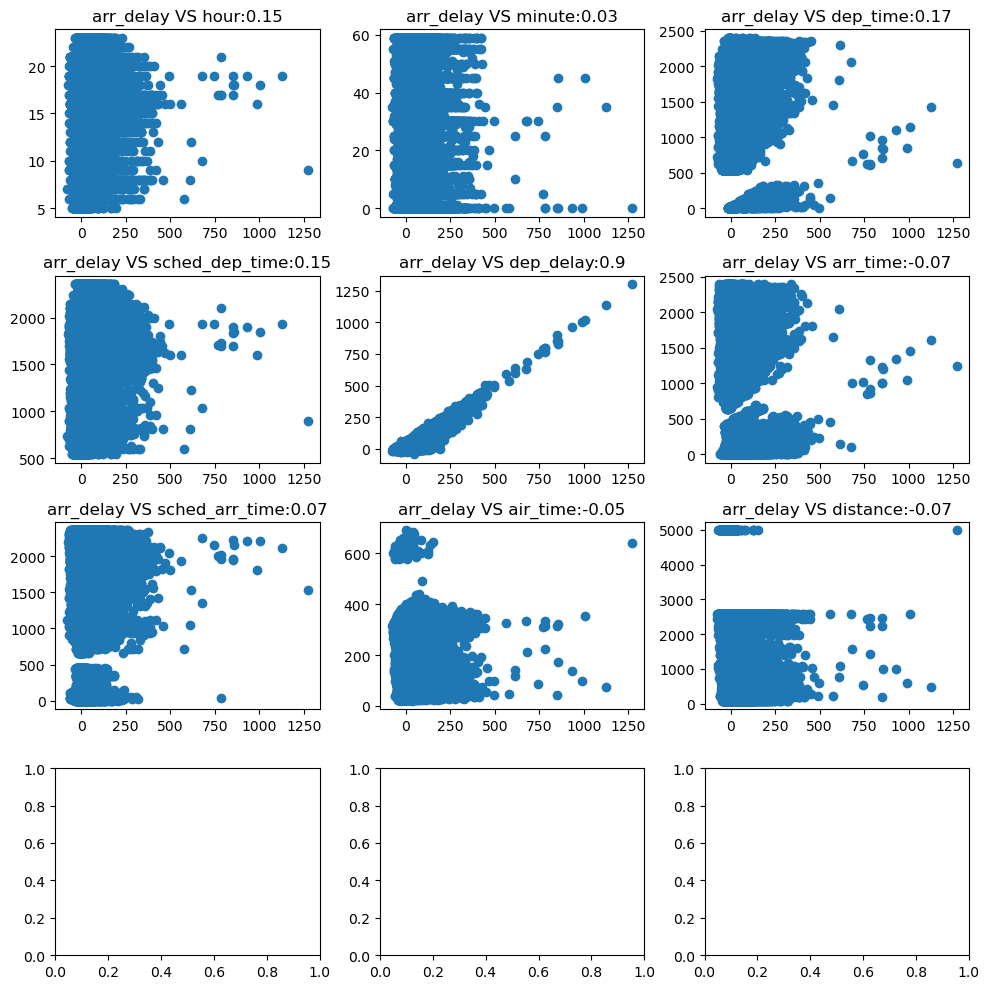

Corrolations on feature dep_delay:



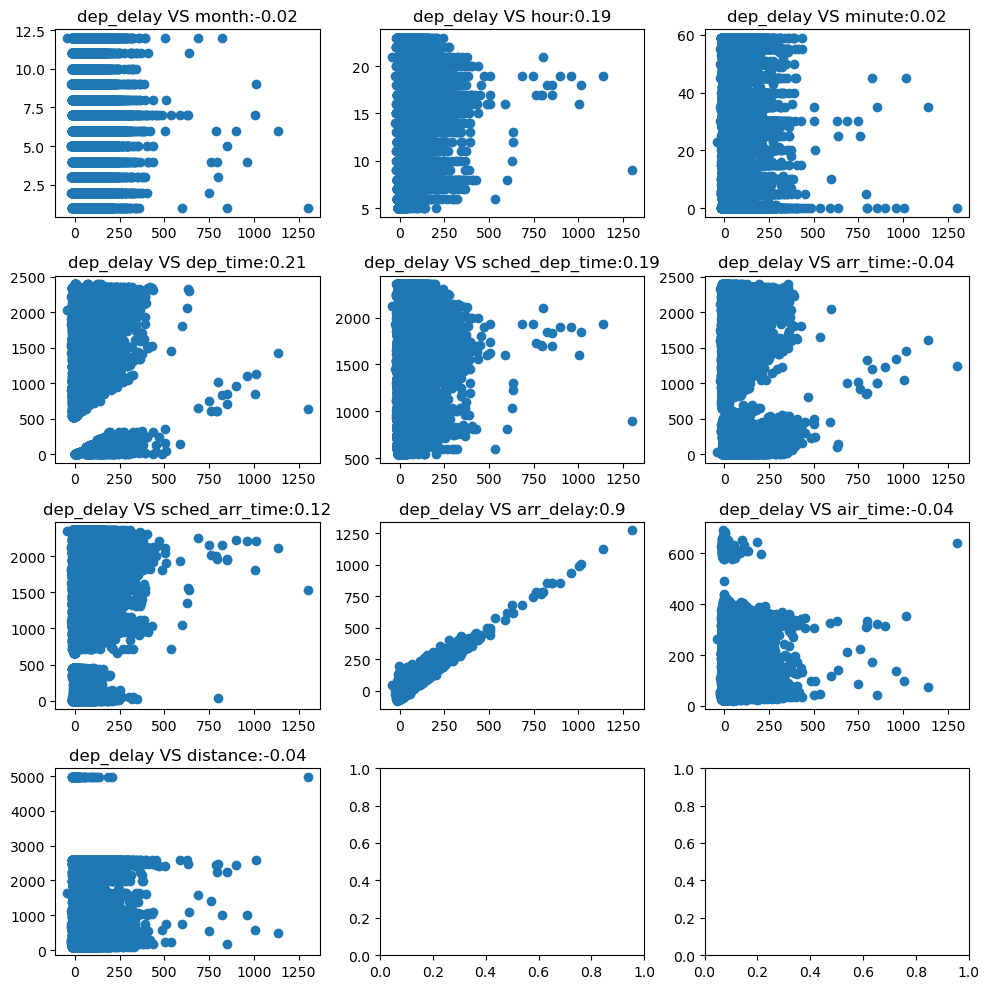

Corrolations in group: LGA
Corrolations on feature arr_delay:



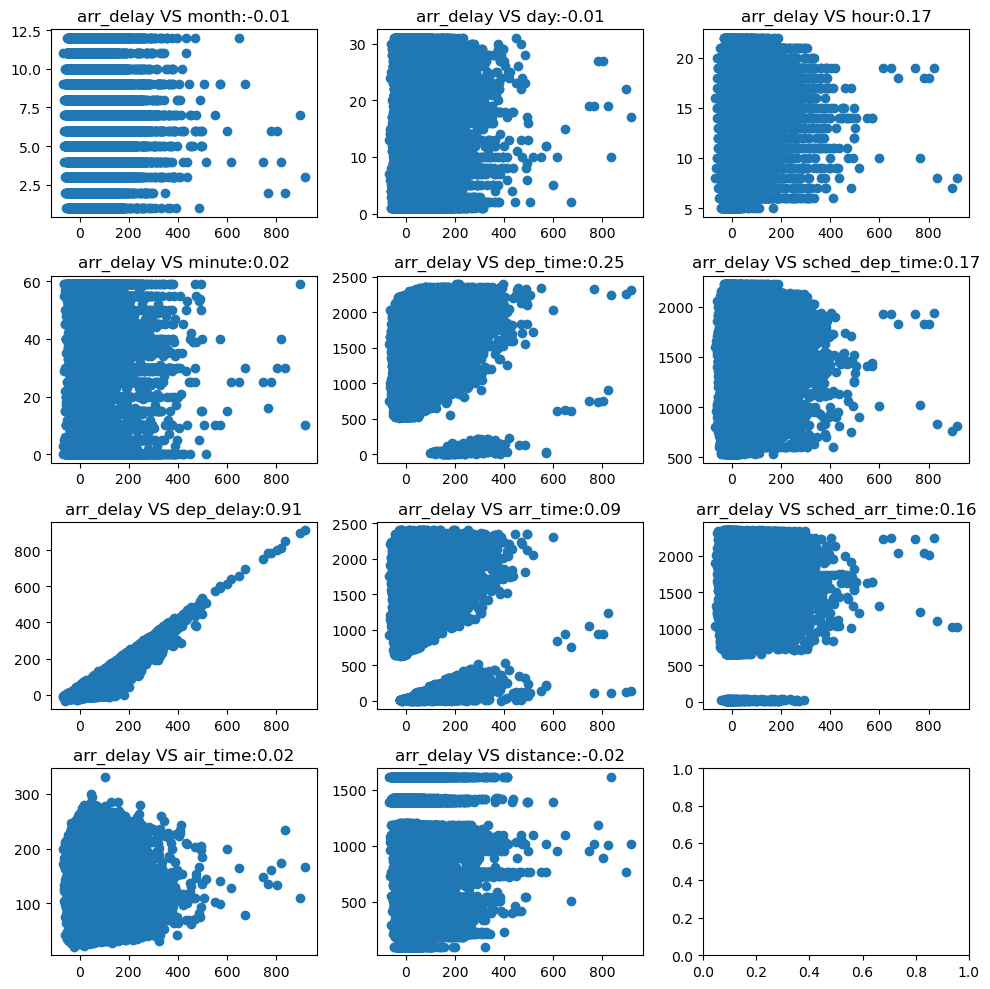

Corrolations on feature dep_delay:



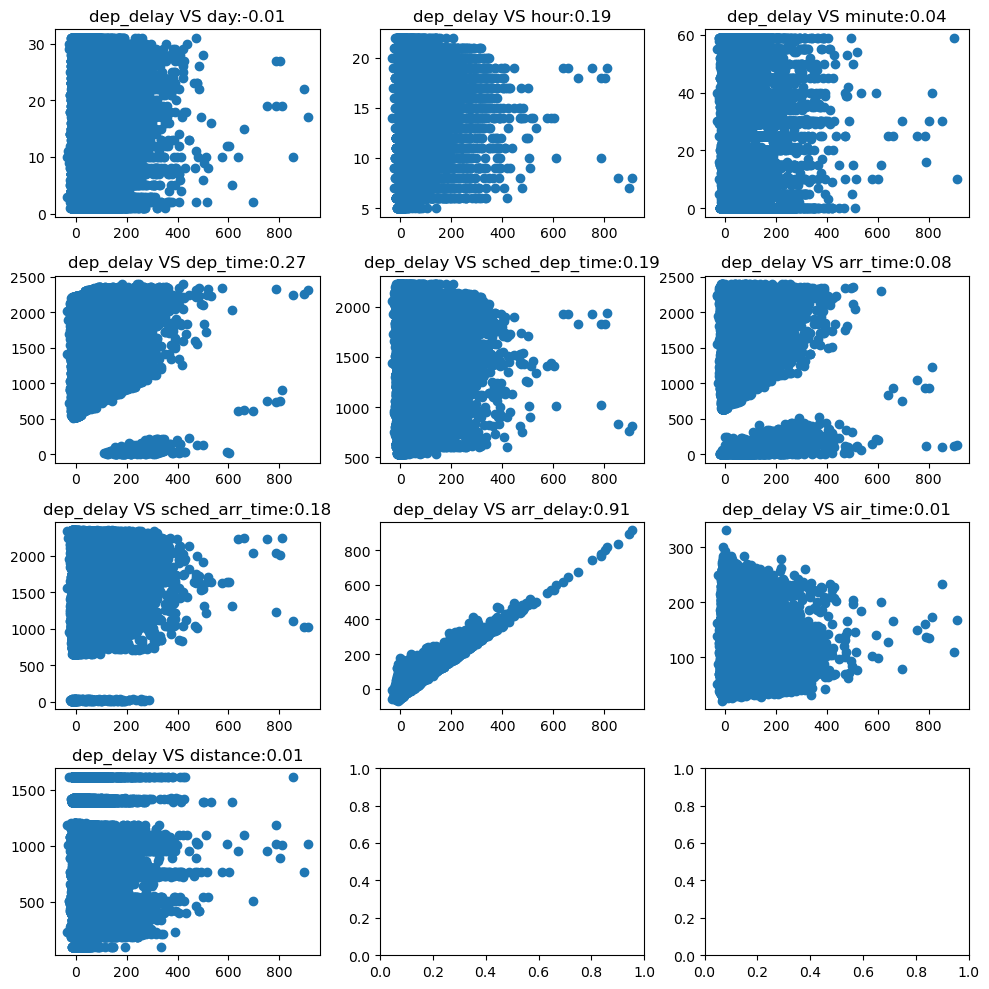

In [15]:
def groupPlot(df, features ,groupOn, important=True):
    corrs,pCorrs=corrolationInGroup(df,clmns=numericCols,group=groupOn, importantsOnly=important ) 
    if len(groupOn)==0:
        printOneGroup(pCorrs, df , features)
    else:      
        for  g in df.groupby(groupOn).groups.keys(): 
                print("Corrolations in group: "+g)
                printOneGroup( pCorrs.loc[g,:] ,df.groupby(groupOn).get_group(g) , features)
            
               

def printOneGroup( customCorr ,customGroup , features):  
        customCorr=customCorr[features] 
        numOfFigs=(customCorr.replace("  -  ", np.nan).apply(pd.to_numeric)).count()
        for i,f in enumerate(features):
                figrow,figcol=0,0
                print(f"Corrolations on feature {f}:\n")
                fig, axes = plt.subplots(nrows=numOfFigs[i]//3 +1, ncols=3, figsize=(10,10)) 
                for f2 in  (numericCols): 
                    if customCorr[f][f2]!=np.nan and customCorr[f][f2]!='  -  ' : 
                        axes[figrow][figcol].scatter(customGroup[f], customGroup[f2]) 
                        axes[figrow][figcol].set_title(f+" VS "+f2+":"+str(customCorr[f][f2]))
                        figcol+=1
                        if figcol>=3 :
                            figrow+=1
                            figcol=0  
                plt.tight_layout()
                plt.show()  
        
    
    
groupPlot(df,features=['arr_delay','dep_delay'],groupOn=['origin'], important=True)
        

For now, we do not intend to investigate each origin seprately. Our important descision features are "arr_delay , dep_delay" . Hence we investigate the corrolation of other features due to these features.

Corrolations on feature arr_delay:



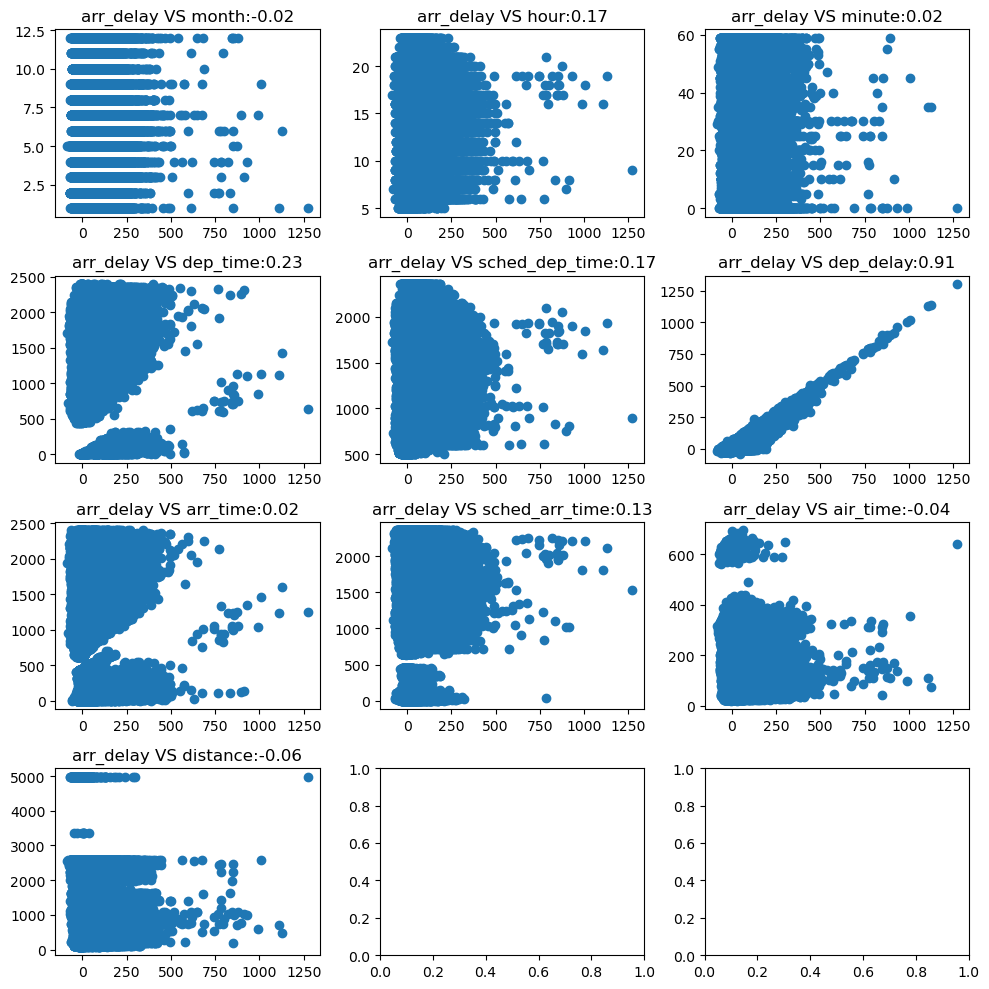

Corrolations on feature dep_delay:



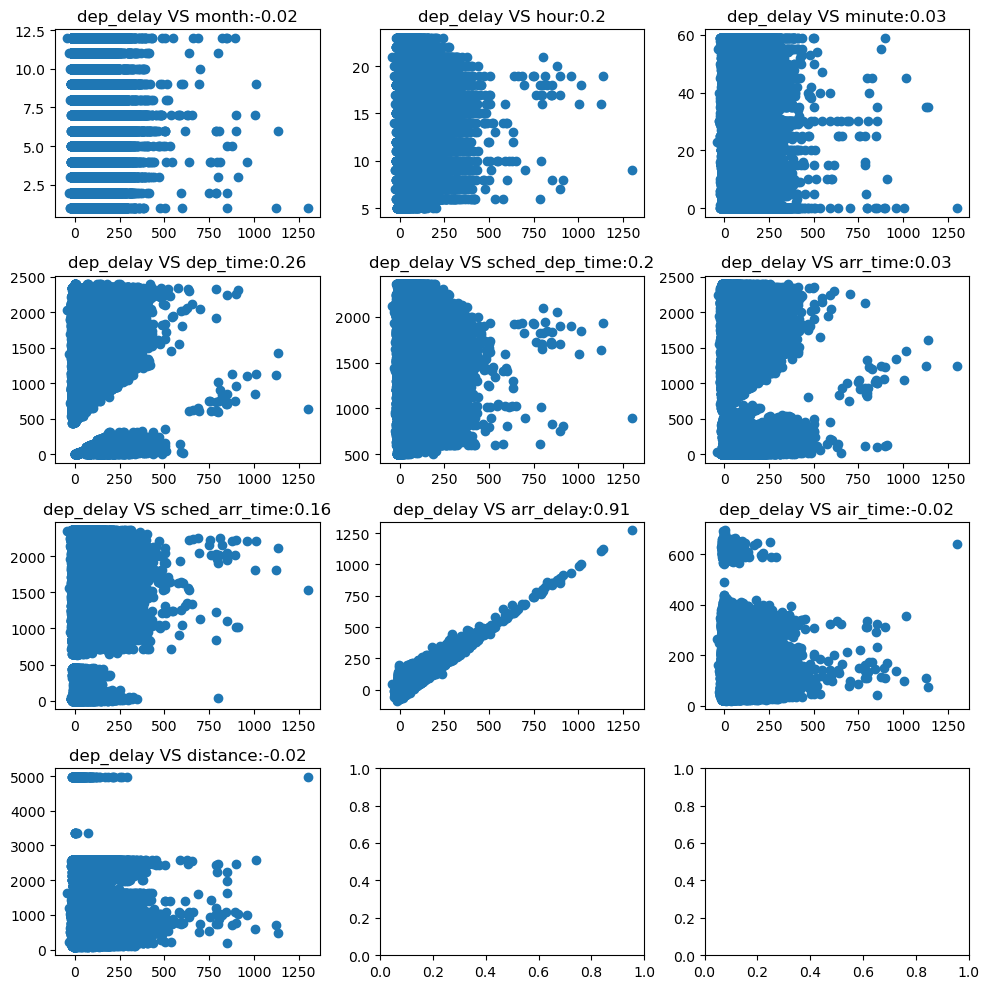

In [10]:
groupPlot(df,features=['arr_delay','dep_delay'],groupOn=[])

As is obvious that "air_time" and "distance" are highly corrolated. The longer distsance, the more air_time. Also the "arrival time" is highly dependent (nearly 0.788 )to the "scheduled arrival time" based on the last figure in third row. But the "departure time" is more corrolated with the "scheduled departure time" (nearly 0.95). It shows that the departure scheduling performance is better that the arrival scheduling. 
  
The corrolation of the hour on the dep_delay and arr_delay are 0.2 and 0.17 respectively. Although it is not significant but it shows that for the flights in the last hours of the day (greater hour) we have more departure delay and arrival delay.

The corrolation of the departure time on departure delay or arrival delay is not significant (see the two figures in the second column. the corrolations are 0.26 , 0.23 )